# Assignment

## Instructions

### Text Classification for Spam Detection

In this assignment, you will build a text classification model using Naive Bayes to classify SMS messages as spam or ham (non-spam). You will implement text preprocessing techniques and use the Vector Space Model (TF-IDF) to represent the text data.

#### Dataset

You will be using the SMS Spam Collection dataset, which contains a set of SMS messages that have been labeled as either spam or ham (legitimate). This dataset is available through several Python libraries or can be downloaded directly.

#### Tasks

1. **Text Preprocessing**:

   - Load the dataset
   - Implement tokenization
   - Apply stemming or lemmatization
   - Remove stopwords

2. **Feature Extraction**:

   - Use TF-IDF vectorization to convert the text data into numerical features
   - Explore the most important features for spam and ham categories

3. **Classification**:

   - Split the data into training and testing sets
   - Train a Multinomial Naive Bayes classifier
   - Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score)
   - Create a confusion matrix to visualize the results

4. **Analysis**:
   - Analyze false positives and false negatives
   - Identify characteristics of messages that are frequently misclassified
   - Suggest improvements to your model

#### Starter Code

In [9]:
# Data manipulation and analysis
import pandas as pd  # For working with structured data (like Excel but in Python)
import numpy as np   # For numerical operations and arrays

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns           # For beautiful statistical visualizations
from wordcloud import WordCloud # For creating word clouds

# Natural Language Processing
import nltk                          # Natural Language Toolkit - main NLP library
from nltk.corpus import stopwords    # Common words like 'the', 'and', 'is'
from nltk.tokenize import word_tokenize  # Splits text into individual words
from nltk.stem import PorterStemmer     # Reduces words to their root form
import re    # Regular expressions for text cleaning
import string  # String operations

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # Splits data for training/testing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Converts text to numbers
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.svm import SVC                    # Support Vector Machine classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Model evaluation

# Download required NLTK data (only need to run once)
nltk.download('punkt_tab')      # For tokenization
nltk.download('stopwords')  # For removing common words

print(" All libraries imported successfully!")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...


 All libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Load Dataset

In [2]:
# Load SMS Spam Collection dataset (works perfectly for email spam concepts)
# This dataset contains 5,574 messages labeled as 'ham' (legitimate) or 'spam'
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

# sep='\t' means the data is separated by tabs
# names parameter gives column names since the file doesn't have headers
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

# Display basic information about our dataset
print("📊 Dataset Overview:")
print(f"Dataset shape: {df.shape}")  # Shows (rows, columns)
print("\n📋 First 5 rows:")
print(df.head())
print("\n📈 Label distribution:")
print(df['label'].value_counts())  # Count of spam vs ham messages
print(f"\n📊 Spam percentage: {(df['label'] == 'spam').mean() * 100:.1f}%")

📊 Dataset Overview:
Dataset shape: (5572, 2)

📋 First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

📈 Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

📊 Spam percentage: 13.4%


## 3. EDA

In [3]:
# Add new columns to analyze message patterns
df['message_length'] = df['message'].str.len()        # Count characters in each message
df['word_count'] = df['message'].str.split().str.len() # Count words in each message

# Calculate statistics for spam vs ham messages
print("📊 Message Statistics:")
print("\n--- HAM (Legitimate) Messages ---")
ham_messages = df[df['label'] == 'ham']
print(f"Average length: {ham_messages['message_length'].mean():.1f} characters")
print(f"Average word count: {ham_messages['word_count'].mean():.1f} words")

print("\n--- SPAM Messages ---")
spam_messages = df[df['label'] == 'spam']
print(f"Average length: {spam_messages['message_length'].mean():.1f} characters")
print(f"Average word count: {spam_messages['word_count'].mean():.1f} words")

📊 Message Statistics:

--- HAM (Legitimate) Messages ---
Average length: 71.5 characters
Average word count: 14.3 words

--- SPAM Messages ---
Average length: 138.7 characters
Average word count: 23.9 words


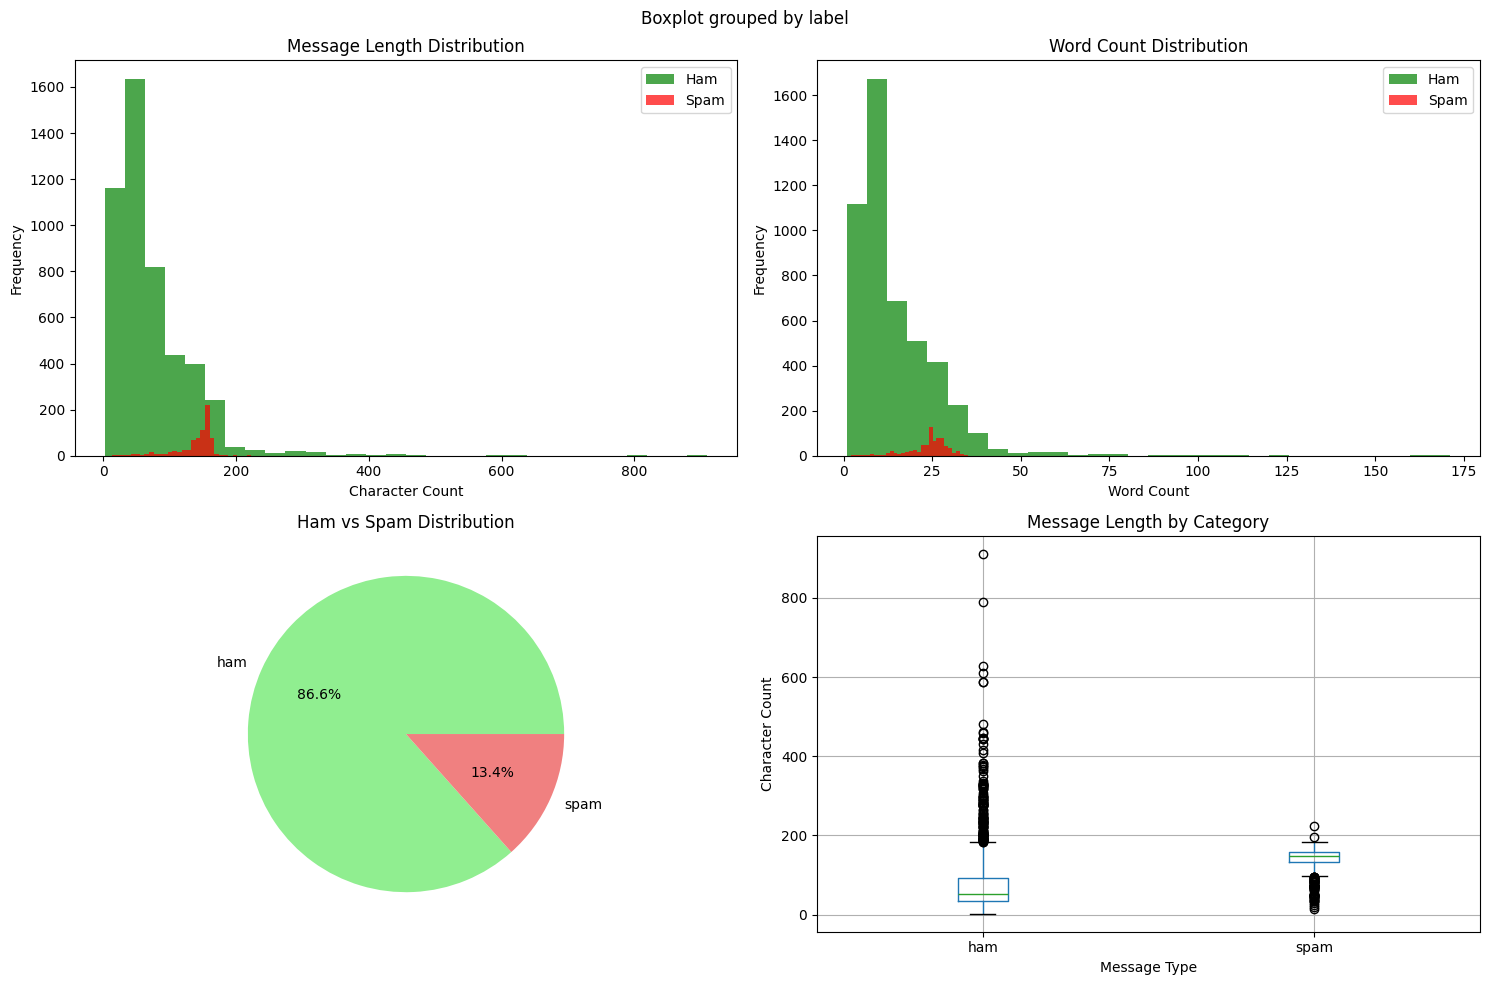

In [4]:
# Create a 2x2 grid of visualizations to understand our data better
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Message length distribution
# This shows how long spam vs ham messages typically are
axes[0,0].hist(ham_messages['message_length'], alpha=0.7, label='Ham', bins=30, color='green')
axes[0,0].hist(spam_messages['message_length'], alpha=0.7, label='Spam', bins=30, color='red')
axes[0,0].set_title('Message Length Distribution')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Plot 2: Word count distribution
# This shows how many words spam vs ham messages typically contain
axes[0,1].hist(ham_messages['word_count'], alpha=0.7, label='Ham', bins=30, color='green')
axes[0,1].hist(spam_messages['word_count'], alpha=0.7, label='Spam', bins=30, color='red')
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Plot 3: Label distribution (pie chart)
# Shows the proportion of spam vs ham in our dataset
label_counts = df['label'].value_counts()
axes[1,0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
              colors=['lightgreen', 'lightcoral'])
axes[1,0].set_title('Ham vs Spam Distribution')

# Plot 4: Box plot comparing message lengths
# Box plots show the distribution spread and outliers
df.boxplot(column='message_length', by='label', ax=axes[1,1])
axes[1,1].set_title('Message Length by Category')
axes[1,1].set_xlabel('Message Type')
axes[1,1].set_ylabel('Character Count')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

*Create Word Clouds*

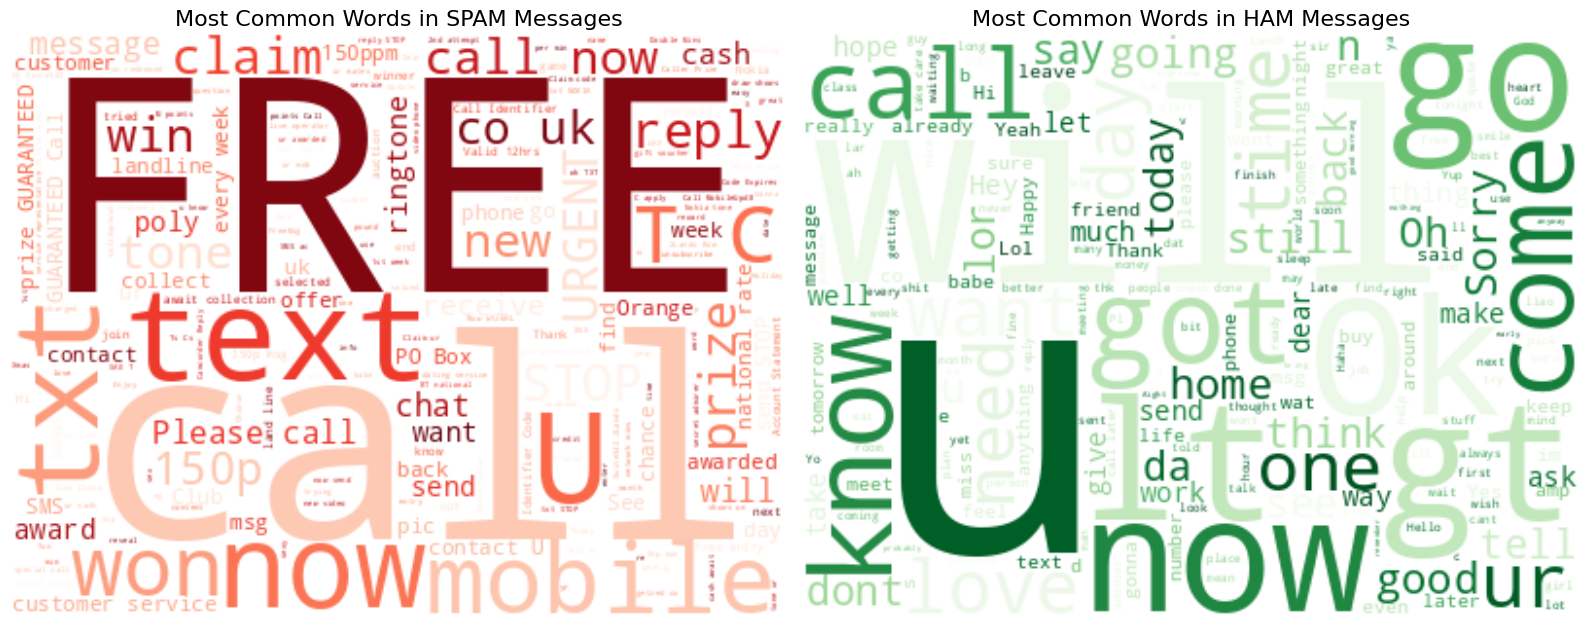

In [5]:
# Word clouds show the most common words visually
# Larger words appear more frequently in the text

# Combine all spam messages into one large text string
spam_text = ' '.join(spam_messages['message'])
# Combine all ham messages into one large text string
ham_text = ' '.join(ham_messages['message'])

# Create side-by-side word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Spam word cloud - shows what words appear most in spam
spam_wordcloud = WordCloud(width=400, height=300,
                          background_color='white',
                          colormap='Reds').generate(spam_text)
axes[0].imshow(spam_wordcloud, interpolation='bilinear')
axes[0].set_title('Most Common Words in SPAM Messages', fontsize=16)
axes[0].axis('off')  # Remove axis labels

# Ham word cloud - shows what words appear most in legitimate messages
ham_wordcloud = WordCloud(width=400, height=300,
                         background_color='white',
                         colormap='Greens').generate(ham_text)
axes[1].imshow(ham_wordcloud, interpolation='bilinear')
axes[1].set_title('Most Common Words in HAM Messages', fontsize=16)
axes[1].axis('off')  # Remove axis labels

plt.tight_layout()
plt.show()

## 4. Text Preprocessing

In [10]:
def clean_text(text):
    """
    Clean and preprocess text data for machine learning.
    Think of this like preparing ingredients before cooking:
    - Remove unwanted parts (punctuation, numbers)
    - Make everything uniform (lowercase)
    - Break into pieces (tokenization)
    - Remove common words that don't help classification
    - Reduce words to their root form (stemming)
    """

    # Step 1: Convert to lowercase for consistency
    # "Hello" and "hello" should be treated the same
    text = text.lower()

    # Step 2: Remove punctuation and numbers using regular expressions
    # Keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Step 3: Tokenization - split text into individual words
    # "hello world" becomes ["hello", "world"]
    tokens = word_tokenize(text)

    # Step 4: Remove stopwords (common words that don't help classification)
    # Words like 'the', 'and', 'is' don't tell us if something is spam
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # Step 5: Stemming - reduce words to their root form
    # "running", "runs", "ran" all become "run"
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Step 6: Join tokens back into a single string
    return ' '.join(tokens)

# Test the function with example messages
print("🧪 Testing text cleaning function:")
print("\n--- Original Message ---")
original = df['message'].iloc[0]  # Get first message
print(f"'{original}'")

print("\n--- Cleaned Message ---")
cleaned = clean_text(original)
print(f"'{cleaned}'")

print("\n--- Another Example ---")
test_message = "FREE! Win $1000 NOW!!! Call 123-456-7890"
print(f"Original: '{test_message}'")
print(f"Cleaned: '{clean_text(test_message)}'")


🧪 Testing text cleaning function:

--- Original Message ---
'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

--- Cleaned Message ---
'jurong point crazi avail bugi great world buffet cine got amor wat'

--- Another Example ---
Original: 'FREE! Win $1000 NOW!!! Call 123-456-7890'
Cleaned: 'free win call'


In [11]:
# Apply the cleaning function to all messages in our dataset
print("🧹 Cleaning all messages... This may take a minute.")

# Create a new column with cleaned messages
# .apply() runs our clean_text function on every message
df['cleaned_message'] = df['message'].apply(clean_text)

print("✅ Text cleaning complete!")

# Show before and after examples
print("\n📋 Cleaning Examples:")
for i in range(3):  # Show first 3 examples
    print(f"\n--- Example {i+1} ---")
    print(f"Original:  '{df['message'].iloc[i]}'")
    print(f"Cleaned:   '{df['cleaned_message'].iloc[i]}'")
    print(f"Label:     {df['label'].iloc[i]}")

🧹 Cleaning all messages... This may take a minute.
✅ Text cleaning complete!

📋 Cleaning Examples:

--- Example 1 ---
Original:  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
Cleaned:   'jurong point crazi avail bugi great world buffet cine got amor wat'
Label:     ham

--- Example 2 ---
Original:  'Ok lar... Joking wif u oni...'
Cleaned:   'lar joke wif oni'
Label:     ham

--- Example 3 ---
Original:  'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's'
Cleaned:   'free entri wkli comp win cup final tkt may text receiv entri questionstd txt ratetc appli over'
Label:     spam


## 5. Feature Engineering

**Prepare Data for ML**

In [12]:
# Separate features (X) and target variable (y)
X = df['cleaned_message']  # Features: the cleaned text messages
y = df['label']           # Target: spam or ham labels

# Convert text labels to numbers (required for machine learning)
# 'ham' becomes 0, 'spam' becomes 1
y_binary = y.map({'ham': 0, 'spam': 1})

print("📊 Data Preparation Summary:")
print(f"Number of messages: {len(X)}")
print(f"Features type: {type(X)}")
print(f"Target distribution:")
print(f"  Ham (0): {(y_binary == 0).sum()}")
print(f"  Spam (1): {(y_binary == 1).sum()}")

📊 Data Preparation Summary:
Number of messages: 5572
Features type: <class 'pandas.core.series.Series'>
Target distribution:
  Ham (0): 4825
  Spam (1): 747


**Vectorization (Convert Text to Numbers)**

In [13]:
# Method 1: Count Vectorizer
# Counts how many times each word appears in each message
# Like counting ingredients in recipes
print("🔢 Method 1: Count Vectorizer")
count_vectorizer = CountVectorizer(
    max_features=3000,    # Keep only top 3000 most common words
    ngram_range=(1, 2),   # Use single words and pairs of words
    min_df=2              # Word must appear in at least 2 messages
)

# Transform our text data into a matrix of word counts
X_count = count_vectorizer.fit_transform(X)
print(f"Count Vectorizer shape: {X_count.shape}")
print(f"This means: {X_count.shape[0]} messages, {X_count.shape[1]} features")

# Method 2: TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)
# Not just counts, but considers how important each word is
# Common words get less weight, rare but meaningful words get more weight
print("\n📊 Method 2: TF-IDF Vectorizer")
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,    # Keep only top 3000 most important words
    ngram_range=(1, 2),   # Use single words and pairs of words
    min_df=2,             # Word must appear in at least 2 messages
    max_df=0.95           # Ignore words that appear in >95% of messages
)

# Transform our text data into TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(f"TF-IDF Vectorizer shape: {X_tfidf.shape}")

# Show some example features (words/phrases the model will use)
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n🔤 Example features: {list(feature_names[:10])}")
print(f"🔤 More features: {list(feature_names[1000:1010])}")

🔢 Method 1: Count Vectorizer
Count Vectorizer shape: (5572, 3000)
This means: 5572 messages, 3000 features

📊 Method 2: TF-IDF Vectorizer
TF-IDF Vectorizer shape: (5572, 3000)

🔤 Example features: ['aathiwher', 'aathiwher dear', 'abi', 'abiola', 'abl', 'abl get', 'abt', 'abta', 'abta complimentari', 'acc']
🔤 More features: ['go lunch', 'go rain', 'go sch', 'go sleep', 'go take', 'goal', 'god', 'god crack', 'god creat', 'god laugh']


Understanding Vectorization

In [14]:
# Let's see how vectorization works with a simple example
example_messages = [
    "free money now",
    "meet for coffee",
    "win free prize money"
]

# Create a simple vectorizer for demonstration
demo_vectorizer = CountVectorizer()
demo_matrix = demo_vectorizer.fit_transform(example_messages)

# Show the feature names (vocabulary)
vocab = demo_vectorizer.get_feature_names_out()
print("🎯 Vectorization Example:")
print(f"Vocabulary: {list(vocab)}")

# Convert to dense array to see the actual numbers
dense_matrix = demo_matrix.toarray()
print("\n📊 Count Matrix:")
for i, message in enumerate(example_messages):
    print(f"'{message}' → {dense_matrix[i]}")

print("\n💡 Each number represents how many times each word appears in that message")

🎯 Vectorization Example:
Vocabulary: ['coffee', 'for', 'free', 'meet', 'money', 'now', 'prize', 'win']

📊 Count Matrix:
'free money now' → [0 0 1 0 1 1 0 0]
'meet for coffee' → [1 1 0 1 0 0 0 0]
'win free prize money' → [0 0 1 0 1 0 1 1]

💡 Each number represents how many times each word appears in that message


## 6. Model Training

In [15]:
# Split data into training (80%) and testing (20%) sets

# Split Count Vectorizer data
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, y_binary,     # Features and target
    test_size=0.2,         # 20% for testing
    random_state=42,       # For reproducible results
    stratify=y_binary      # Maintain same spam/ham ratio in both sets
)

# Split TF-IDF data (same split pattern)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

print("📊 Data Split Summary:")
print(f"Training set size: {X_train_count.shape[0]} messages")
print(f"Test set size: {X_test_count.shape[0]} messages")
print(f"Features per message: {X_train_count.shape[1]}")

# Check that split maintained class balance
print(f"\nTraining set spam ratio: {y_train.mean():.3f}")
print(f"Test set spam ratio: {y_test.mean():.3f}")

📊 Data Split Summary:
Training set size: 4457 messages
Test set size: 1115 messages
Features per message: 3000

Training set spam ratio: 0.134
Test set spam ratio: 0.134


**Train Naive Bayes Models**

In [16]:
# Naive Bayes is great for text classification
# It assumes features are independent and uses probability

print("🧠 Training Naive Bayes Models...")

# Model 1: Naive Bayes with Count Vectorizer
nb_count = MultinomialNB(alpha=1.0)  # alpha is smoothing parameter
nb_count.fit(X_train_count, y_train)  # Train the model
print("✅ Naive Bayes (Count) trained")

# Model 2: Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB(alpha=1.0)
nb_tfidf.fit(X_train_tfidf, y_train)  # Train the model
print("✅ Naive Bayes (TF-IDF) trained")

# Quick accuracy check on training data
train_accuracy_count = nb_count.score(X_train_count, y_train)
train_accuracy_tfidf = nb_tfidf.score(X_train_tfidf, y_train)

print(f"\n📊 Training Accuracies:")
print(f"Naive Bayes (Count): {train_accuracy_count:.4f}")
print(f"Naive Bayes (TF-IDF): {train_accuracy_tfidf:.4f}")

🧠 Training Naive Bayes Models...
✅ Naive Bayes (Count) trained
✅ Naive Bayes (TF-IDF) trained

📊 Training Accuracies:
Naive Bayes (Count): 0.9865
Naive Bayes (TF-IDF): 0.9785


**Train Support Vector Machine**

In [17]:
# SVM finds the best boundary between spam and ham messages
# It's often more accurate but takes longer to train

print("\n🎯 Training Support Vector Machine...")

# SVM with TF-IDF (usually works better than counts for SVM)
svm_model = SVC(
    kernel='linear',      # Linear boundary works well for text
    probability=True,     # Enable probability predictions
    random_state=42       # For reproducible results
)

# Train the SVM (this might take a minute)
print("⏳ Training SVM... (this may take a moment)")
svm_model.fit(X_train_tfidf, y_train)
print("✅ SVM trained successfully")

# Check training accuracy
svm_train_accuracy = svm_model.score(X_train_tfidf, y_train)
print(f"SVM training accuracy: {svm_train_accuracy:.4f}")

print("\n🎉 All models trained successfully!")


🎯 Training Support Vector Machine...
⏳ Training SVM... (this may take a moment)
✅ SVM trained successfully
SVM training accuracy: 0.9904

🎉 All models trained successfully!


## 7. Model Evaluation

Make predictions and calculate performance metrics

In [18]:
# Now test our models on unseen data (the test set)
print("🔮 Making Predictions on Test Data...")

# Naive Bayes (Count) predictions
nb_count_pred = nb_count.predict(X_test_count)
nb_count_accuracy = accuracy_score(y_test, nb_count_pred)

# Naive Bayes (TF-IDF) predictions
nb_tfidf_pred = nb_tfidf.predict(X_test_tfidf)
nb_tfidf_accuracy = accuracy_score(y_test, nb_tfidf_pred)

# SVM predictions
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("📈 Test Set Accuracies:")
print(f"Naive Bayes (Count):  {nb_count_accuracy:.4f} ({nb_count_accuracy*100:.1f}%)")
print(f"Naive Bayes (TF-IDF): {nb_tfidf_accuracy:.4f} ({nb_tfidf_accuracy*100:.1f}%)")
print(f"SVM (TF-IDF):         {svm_accuracy:.4f} ({svm_accuracy*100:.1f}%)")

🔮 Making Predictions on Test Data...
📈 Test Set Accuracies:
Naive Bayes (Count):  0.9794 (97.9%)
Naive Bayes (TF-IDF): 0.9713 (97.1%)
SVM (TF-IDF):         0.9812 (98.1%)


Classification Reports

In [19]:
# Classification report shows precision, recall, and F1-score for each class
# This is more informative than just accuracy

def show_classification_report(y_true, y_pred, model_name):
    """Display detailed classification metrics"""
    print(f"\n{'='*50}")
    print(f"{model_name} - Detailed Results")
    print(f"{'='*50}")

    # Classification report with explanation
    report = classification_report(y_true, y_pred,
                                 target_names=['Ham', 'Spam'],
                                 digits=4)
    print(report)

    print("\n💡 Metrics Explanation:")
    print("📍 Precision: Of all messages we predicted as spam, how many were actually spam?")
    print("📍 Recall: Of all actual spam messages, how many did we catch?")
    print("📍 F1-Score: Harmonic mean of precision and recall")
    print("📍 Support: Number of actual messages in each category")

# Show detailed results for each model
show_classification_report(y_test, nb_count_pred, "Naive Bayes (Count Vectorizer)")
show_classification_report(y_test, nb_tfidf_pred, "Naive Bayes (TF-IDF)")
show_classification_report(y_test, svm_pred, "Support Vector Machine")


Naive Bayes (Count Vectorizer) - Detailed Results
              precision    recall  f1-score   support

         Ham     0.9836    0.9928    0.9882       966
        Spam     0.9500    0.8926    0.9204       149

    accuracy                         0.9794      1115
   macro avg     0.9668    0.9427    0.9543      1115
weighted avg     0.9791    0.9794    0.9791      1115


💡 Metrics Explanation:
📍 Precision: Of all messages we predicted as spam, how many were actually spam?
📍 Recall: Of all actual spam messages, how many did we catch?
📍 F1-Score: Harmonic mean of precision and recall
📍 Support: Number of actual messages in each category

Naive Bayes (TF-IDF) - Detailed Results
              precision    recall  f1-score   support

         Ham     0.9698    0.9979    0.9837       966
        Spam     0.9835    0.7987    0.8815       149

    accuracy                         0.9713      1115
   macro avg     0.9766    0.8983    0.9326      1115
weighted avg     0.9716    0.9713    0.

Confusion Matrices

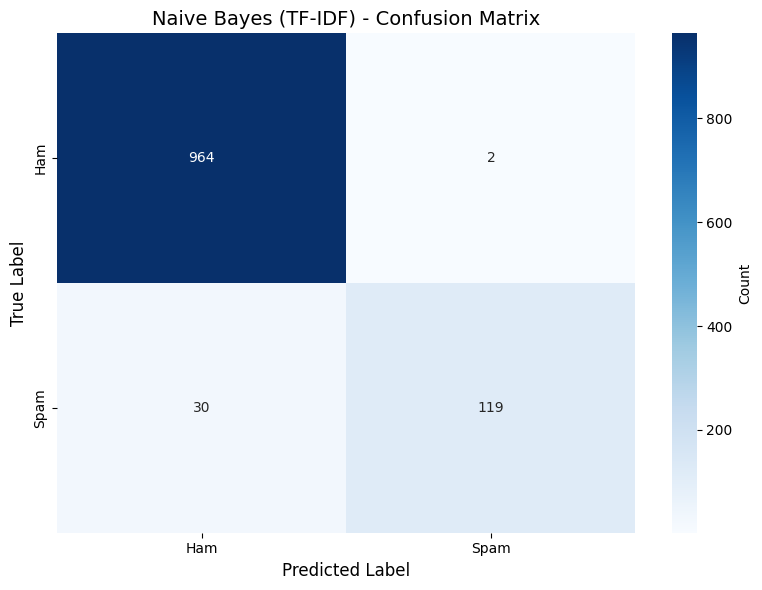


📊 Naive Bayes (TF-IDF) Confusion Matrix Breakdown:
✅ True Negatives (Ham correctly identified): 964
❌ False Positives (Ham labeled as Spam): 2 ← Bad! Blocks good emails
❌ False Negatives (Spam labeled as Ham): 30 ← Spam gets through
✅ True Positives (Spam correctly identified): 119


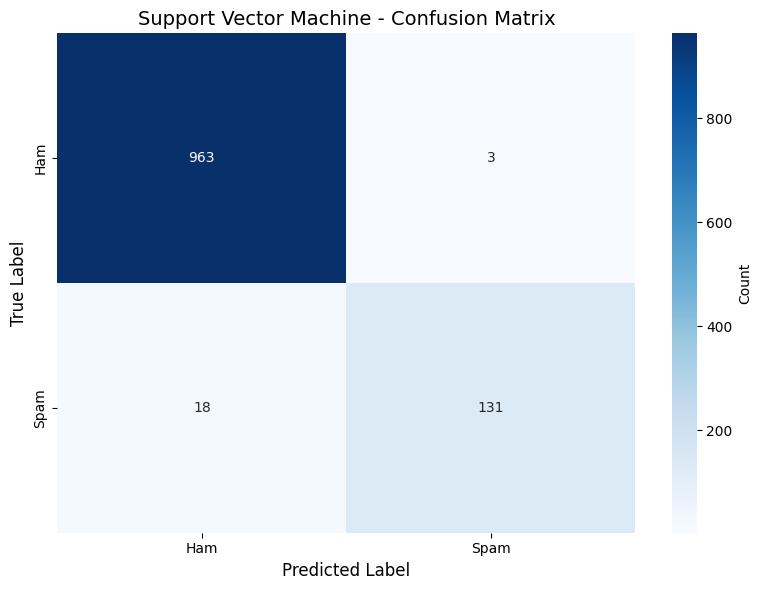


📊 Support Vector Machine Confusion Matrix Breakdown:
✅ True Negatives (Ham correctly identified): 963
❌ False Positives (Ham labeled as Spam): 3 ← Bad! Blocks good emails
❌ False Negatives (Spam labeled as Ham): 18 ← Spam gets through
✅ True Positives (Spam correctly identified): 131


In [21]:
# Confusion matrices show exactly where our models make mistakes
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Create and display confusion matrix"""

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'],
                cbar_kws={'label': 'Count'})

    plt.title(f'{model_name} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)

    # Add explanatory text
    # plt.figtext(0.02, 0.02,
    #            "💡 Perfect predictions would show numbers only on the diagonal.\n" +
    #            "Off-diagonal numbers represent mistakes.",
    #            fontsize=10, ha='left')

    plt.tight_layout()
    plt.show()

    # Print interpretation
    tn, fp, fn, tp = cm.ravel()  # True Neg, False Pos, False Neg, True Pos
    print(f"\n📊 {model_name} Confusion Matrix Breakdown:")
    print(f"✅ True Negatives (Ham correctly identified): {tn}")
    print(f"❌ False Positives (Ham labeled as Spam): {fp} ← Bad! Blocks good emails")
    print(f"❌ False Negatives (Spam labeled as Ham): {fn} ← Spam gets through")
    print(f"✅ True Positives (Spam correctly identified): {tp}")

# Create confusion matrices for all models
plot_confusion_matrix(y_test, nb_tfidf_pred, "Naive Bayes (TF-IDF)")
plot_confusion_matrix(y_test, svm_pred, "Support Vector Machine")

Model Comparison Visualization

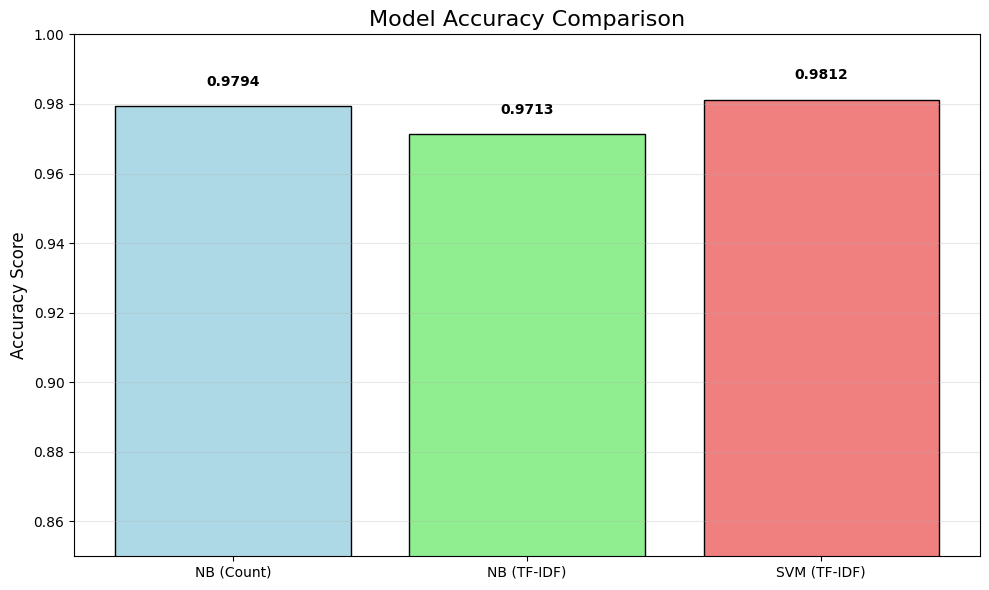

🏆 Model Performance Summary:
Best performing model: SVM (TF-IDF) with 0.9812 accuracy


In [22]:
# Create a visual comparison of all models
models_comparison = {
    'Model': ['NB (Count)', 'NB (TF-IDF)', 'SVM (TF-IDF)'],
    'Accuracy': [nb_count_accuracy, nb_tfidf_accuracy, svm_accuracy]
}

comparison_df = pd.DataFrame(models_comparison)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'],
               color=['lightblue', 'lightgreen', 'lightcoral'],
               edgecolor='black', linewidth=1)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0.85, 1.0)  # Focus on the high accuracy range

# Add accuracy values on bars
for bar, accuracy in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("🏆 Model Performance Summary:")
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']
print(f"Best performing model: {best_model} with {best_accuracy:.4f} accuracy")

## 8. Model Deployment and Testing

Choose Best model and Create Prediction Function

In [23]:
# Based on our evaluation, let's choose the best model
# (Adjust this based on your results)
best_model = svm_model  # Usually SVM performs best
best_vectorizer = tfidf_vectorizer

def predict_spam(message, model=best_model, vectorizer=best_vectorizer):
    """
    Predict if a single message is spam or ham

    Args:
        message (str): The email/message to classify
        model: Trained machine learning model
        vectorizer: Fitted vectorizer to convert text to numbers

    Returns:
        tuple: (prediction, confidence_score)
    """

    # Step 1: Clean the input message (same preprocessing as training)
    cleaned_message = clean_text(message)

    # Step 2: Convert to vector format the model expects
    message_vector = vectorizer.transform([cleaned_message])

    # Step 3: Make prediction (0 = ham, 1 = spam)
    prediction = model.predict(message_vector)[0]

    # Step 4: Get confidence score (probability)
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(message_vector)[0]
        confidence = probabilities[prediction]  # Confidence in the prediction
    else:
        confidence = 1.0  # Some models don't provide probabilities

    # Step 5: Convert prediction back to text
    result = "SPAM" if prediction == 1 else "HAM"

    return result, confidence

print("✅ Prediction function created!")

✅ Prediction function created!


Test with Examples

In [24]:
# Test our spam detector with various messages
test_messages = [
    # Obvious spam examples
    "Congratulations! You've won $1000! Click here to claim your prize NOW!",
    "URGENT: Your account will be closed! Verify now: www.fake-bank.com",
    "Get rich quick! Work from home! Earn $5000/week! No experience needed!",
    "FREE MONEY! No strings attached! Call now!!!",

    # Obvious ham (legitimate) examples
    "Hey, are we still meeting for coffee tomorrow at 3pm?",
    "The quarterly report is attached. Please review before the meeting.",
    "Happy birthday! Hope you have a wonderful day!",
    "Can you pick up milk on your way home?",

    # Tricky examples (could go either way)
    "Limited time offer on our premium software - 50% off this week only",
    "Your Amazon package has been delivered to your front door",
    "Don't forget about the team meeting tomorrow at 10am",
    "You have 1 new voicemail message"
]

print("🔍 Testing Our Spam Detection System")
print("="*60)

for i, message in enumerate(test_messages, 1):
    prediction, confidence = predict_spam(message)

    # Format output with emojis for better readability
    if prediction == "SPAM":
        emoji = "🚨"
        color_indicator = "❌"
    else:
        emoji = "✅"
        color_indicator = "✅"

    print(f"\n{i:2d}. {emoji} {color_indicator} {prediction}")
    print(f"    Confidence: {confidence:.3f} ({confidence*100:.1f}%)")
    print(f"    Message: \"{message}\"")

    # Add interpretation
    if confidence > 0.8:
        certainty = "Very confident"
    elif confidence > 0.6:
        certainty = "Moderately confident"
    else:
        certainty = "Less confident"

    print(f"    Model is: {certainty}")

print("\n" + "="*60)
print("🎯 Testing Complete!")

🔍 Testing Our Spam Detection System

 1. 🚨 ❌ SPAM
    Confidence: 0.996 (99.6%)
    Message: "Congratulations! You've won $1000! Click here to claim your prize NOW!"
    Model is: Very confident

 2. ✅ ✅ HAM
    Confidence: 0.715 (71.5%)
    Message: "URGENT: Your account will be closed! Verify now: www.fake-bank.com"
    Model is: Moderately confident

 3. ✅ ✅ HAM
    Confidence: 1.000 (100.0%)
    Message: "Get rich quick! Work from home! Earn $5000/week! No experience needed!"
    Model is: Very confident

 4. ✅ ✅ HAM
    Confidence: 0.564 (56.4%)
    Message: "FREE MONEY! No strings attached! Call now!!!"
    Model is: Less confident

 5. ✅ ✅ HAM
    Confidence: 1.000 (100.0%)
    Message: "Hey, are we still meeting for coffee tomorrow at 3pm?"
    Model is: Very confident

 6. ✅ ✅ HAM
    Confidence: 0.986 (98.6%)
    Message: "The quarterly report is attached. Please review before the meeting."
    Model is: Very confident

 7. ✅ ✅ HAM
    Confidence: 0.996 (99.6%)
    Message: "

Interactive testing function

In [26]:
def interactive_spam_test():
    """
    Interactive function to test custom messages
    """
    print("🎮 Interactive Spam Detector")
    print("Type 'quit' to exit")
    print("-" * 40)

    while True:
        # Get user input
        user_message = input("\n📝 Enter a message to test: ")

        # Check if user wants to quit
        if user_message.lower() in ['quit', 'exit', 'q']:
            print("👋 Thanks for testing! Goodbye!")
            break

        # Skip empty messages
        if not user_message.strip():
            print("⚠️ Please enter a message to test")
            continue

        # Make prediction
        try:
            prediction, confidence = predict_spam(user_message)

            # Display results
            if prediction == "SPAM":
                print(f"🚨 SPAM DETECTED! (Confidence: {confidence:.3f})")
                print("⚠️ This message has characteristics of spam")
            else:
                print(f"✅ Legitimate message (Confidence: {confidence:.3f})")
                print("👍 This appears to be a normal message")

        except Exception as e:
            print(f"❌ Error processing message: {e}")

# Uncomment the line below to run interactive testing
interactive_spam_test()

🎮 Interactive Spam Detector
Type 'quit' to exit
----------------------------------------

📝 Enter a message to test: hi how are you
✅ Legitimate message (Confidence: 0.989)
👍 This appears to be a normal message

📝 Enter a message to test: congratulatuns!
✅ Legitimate message (Confidence: 0.989)
👍 This appears to be a normal message

📝 Enter a message to test: quit
👋 Thanks for testing! Goodbye!


### Analyze Feature Importance

🚨 TOP SPAM INDICATORS (words that suggest spam):
--------------------------------------------------
 1. 'txt' (importance: 2.9994)
 2. 'claim' (importance: 2.2813)
 3. 'mobil' (importance: 2.1848)
 4. 'rington' (importance: 2.0520)
 5. 'prize' (importance: 1.9285)
 6. 'servic' (importance: 1.8228)
 7. 'video' (importance: 1.7563)
 8. 'repli' (importance: 1.7459)
 9. 'guarante' (importance: 1.6664)
10. 'new messag' (importance: 1.6197)
11. 'pmin' (importance: 1.5855)
12. 'award' (importance: 1.5067)
13. 'mob' (importance: 1.4984)
14. 'ltd' (importance: 1.4877)
15. 'member' (importance: 1.4864)
16. 'credit' (importance: 1.4773)
17. 'order' (importance: 1.4752)
18. 'tone' (importance: 1.4642)
19. 'free' (importance: 1.4510)
20. 'win' (importance: 1.4329)

✅ TOP HAM INDICATORS (words that suggest legitimate messages):
--------------------------------------------------
 1. 'ltgt' (importance: -1.2961)
 2. 'hey' (importance: -1.0942)
 3. 'home' (importance: -1.0701)
 4. 'mail' (importance: -

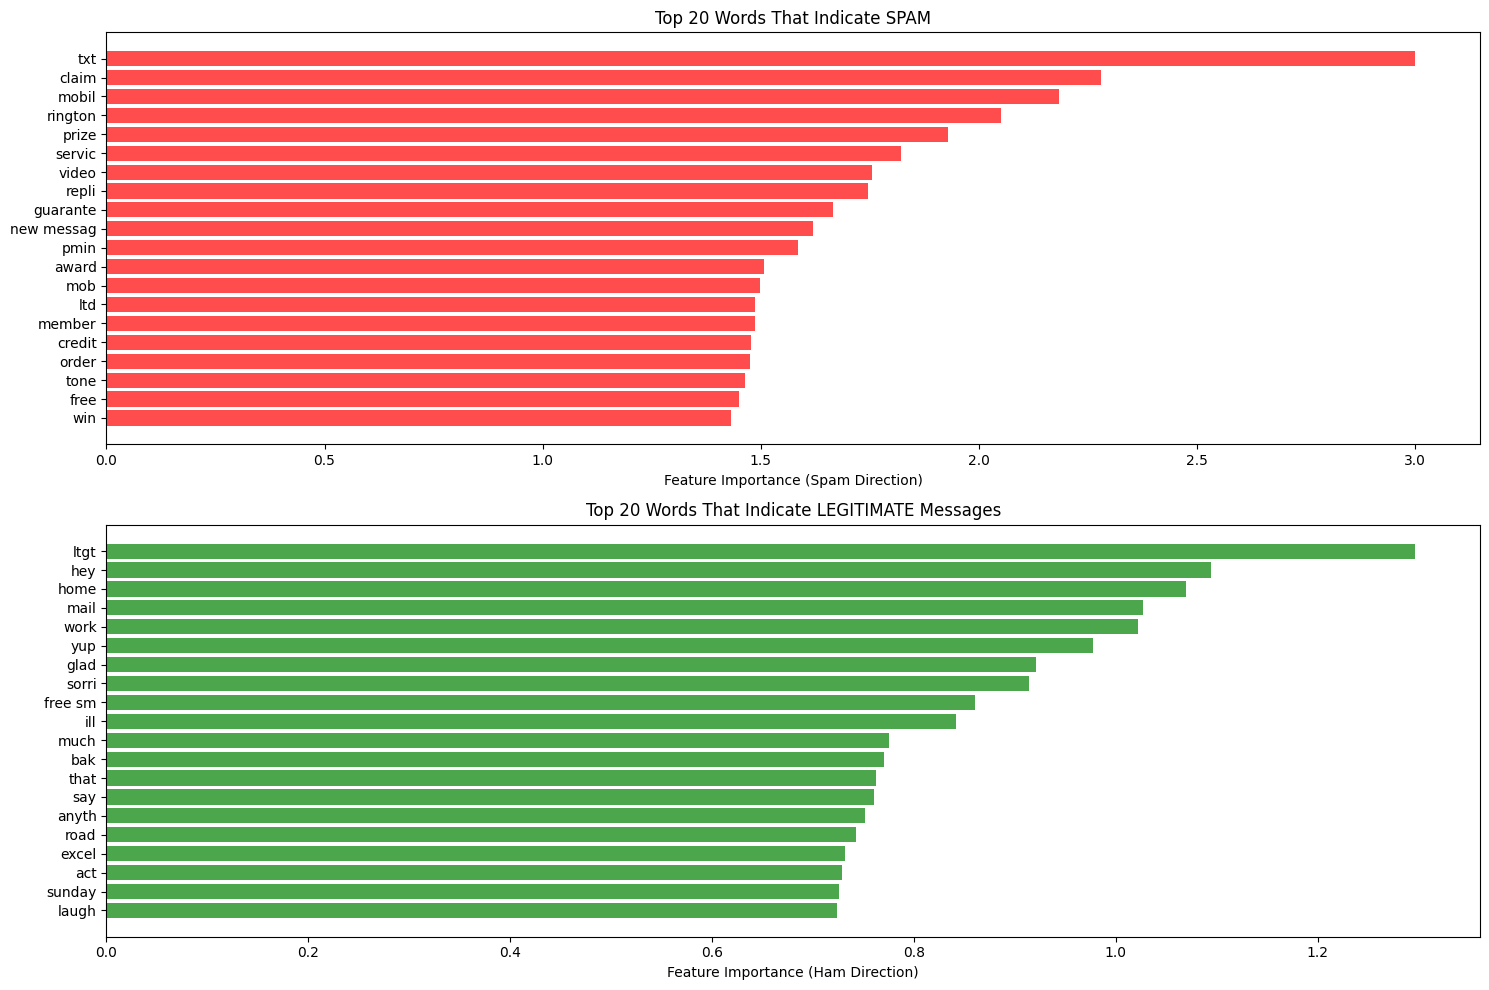

In [29]:
# Show which words/features are most important for spam detection
def analyze_important_features(model=best_model, vectorizer=best_vectorizer, top_n=20):
    """
    Analyze which features (words) are most important for classification
    """

    if hasattr(model, 'coef_'):
        # Get feature names (words/phrases)
        feature_names = vectorizer.get_feature_names_out()
        coefficients = model.coef_[0]

        # Convert sparse coefficients to a dense array for easy formatting
        coefficients_dense = coefficients.toarray()[0]


        # Get top spam indicators (positive coefficients)
        # Use the dense array for sorting
        spam_features = sorted(zip(coefficients_dense, feature_names), reverse=True)[:top_n]


        # Get top ham indicators (negative coefficients)
        # Use the dense array for sorting
        ham_features = sorted(zip(coefficients_dense, feature_names))[:top_n]


        print("🚨 TOP SPAM INDICATORS (words that suggest spam):")
        print("-" * 50)
        for i, (coef, word) in enumerate(spam_features, 1):
            print(f"{i:2d}. '{word}' (importance: {coef:.4f})")

        print("\n✅ TOP HAM INDICATORS (words that suggest legitimate messages):")
        print("-" * 50)
        for i, (coef, word) in enumerate(ham_features, 1):
            print(f"{i:2d}. '{word}' (importance: {coef:.4f})")

        # Create visualization
        plt.figure(figsize=(15, 10))

        # Plot spam indicators
        plt.subplot(2, 1, 1)
        spam_words = [word for coef, word in spam_features]
        spam_scores = [coef for coef, word in spam_features]

        bars1 = plt.barh(range(len(spam_words)), spam_scores, color='red', alpha=0.7)
        plt.yticks(range(len(spam_words)), spam_words)
        plt.xlabel('Feature Importance (Spam Direction)')
        plt.title('Top 20 Words That Indicate SPAM')
        plt.gca().invert_yaxis()

        # Plot ham indicators
        plt.subplot(2, 1, 2)
        ham_words = [word for coef, word in ham_features]
        ham_scores = [abs(coef) for coef, word in ham_features]  # Use absolute value for visualization

        bars2 = plt.barh(range(len(ham_words)), ham_scores, color='green', alpha=0.7)
        plt.yticks(range(len(ham_words)), ham_words)
        plt.xlabel('Feature Importance (Ham Direction)')
        plt.title('Top 20 Words That Indicate LEGITIMATE Messages')
        plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()

    else:
        print("⚠️ This model doesn't provide feature importance information")

# Run the analysis
analyze_important_features()

### Save Model for Future Deployment

In [28]:
import pickle
import joblib
from datetime import datetime

# Save the trained model and vectorizer
def save_model(model, vectorizer, filename_prefix="spam_detector"):
    """
    Save the trained model and vectorizer for future use
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save using joblib (recommended for scikit-learn models)
    model_filename = f"{filename_prefix}_model_{timestamp}.joblib"
    vectorizer_filename = f"{filename_prefix}_vectorizer_{timestamp}.joblib"

    joblib.dump(model, model_filename)
    joblib.dump(vectorizer, vectorizer_filename)

    print(f"✅ Model saved as: {model_filename}")
    print(f"✅ Vectorizer saved as: {vectorizer_filename}")

    # Also save using pickle as backup
    with open(f"{filename_prefix}_model_{timestamp}.pkl", 'wb') as f:
        pickle.dump(model, f)

    with open(f"{filename_prefix}_vectorizer_{timestamp}.pkl", 'wb') as f:
        pickle.dump(vectorizer, f)

    print("✅ Backup pickle files also created")

    return model_filename, vectorizer_filename

# Save your best model
model_file, vectorizer_file = save_model(best_model, best_vectorizer)

# Function to load saved model
def load_model(model_filename, vectorizer_filename):
    """
    Load a previously saved model and vectorizer
    """
    model = joblib.load(model_filename)
    vectorizer = joblib.load(vectorizer_filename)

    print(f"✅ Model loaded from: {model_filename}")
    print(f"✅ Vectorizer loaded from: {vectorizer_filename}")

    return model, vectorizer

print("\n🎉 Your spam detection system is now complete and saved!")
print("You can use the saved files to deploy your model in production.")

✅ Model saved as: spam_detector_model_20251015_095709.joblib
✅ Vectorizer saved as: spam_detector_vectorizer_20251015_095709.joblib
✅ Backup pickle files also created

🎉 Your spam detection system is now complete and saved!
You can use the saved files to deploy your model in production.
